In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Read the CSV file
df = pd.read_csv('spotify-2023.csv', encoding='latin1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


### **Overview of Dataset**

#### How many rows and columns does the dataset contain?

In [35]:
# Get the dimensions of the DataFrame
shape = df.shape

# Display the result
print("Rows and Columns: ", shape)

Rows and Columns:  (953, 24)


#### What are the data types of each column? Are there any missing values?

In [37]:
# Get the data types of each column
dtype = df.dtypes

# Display the result
print("Data types of each column:\n", dtype)

Data types of each column:
 track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


In [43]:
# Get the missing values
missing_values = df.isnull().sum()

# Display the missing values
print("Missing values:\n", missing_values[missing_values > 0])

Missing values:
 streams               1
in_shazam_charts     57
key                 953
dtype: int64


In [41]:
# use coerce to convert the data to numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
df['key'] = pd.to_numeric(df['key'], errors='coerce')

### **Basic Descriptive Statistics**

#### What are the mean, median, and standard deviation of the streams column?

In [45]:
# Get the mean, median, and standard deviation of streams
mean = df['streams'].mean()
median = df['streams'].median()
sd = df['streams'].std()

# Display the mean, median, and standard deviation
print("Mean:\n",mean,"\n\n", "Median:\n",median,"\n\n","Standard Deviation:\n",sd)

Mean:
 514137424.93907565 

 Median:
 290530915.0 

 Standard Deviation:
 566856949.0388832


#### What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

Text(0.5, 1.0, 'Distribution of artist_count')

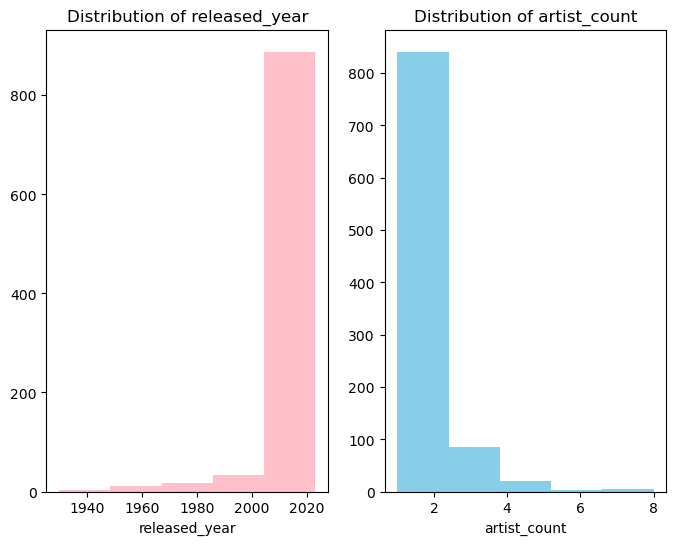

In [47]:
# Create a variable for released_year and artist_count
released_year = df['released_year']
artist_count = df['artist_count']

# Input a figure size for a better visual
plt.figure(figsize=(8, 6)) 

# Histogram for released_year
plt.subplot(1, 2, 1)  #Create subplot at position 1, 1 (top left)
plt.hist(released_year, color='pink', bins=5)
plt.xlabel('released_year')
plt.title('Distribution of released_year')

# Histogram for artist_count
plt.subplot(1, 2, 2)  #Create subplot at position 1, 2 (top right)
plt.hist(artist_count, color='skyblue', bins=5)
plt.xlabel('artist_count')
plt.title('Distribution of artist_count')

Text(0.5, 1.0, 'Box plot of released_year')

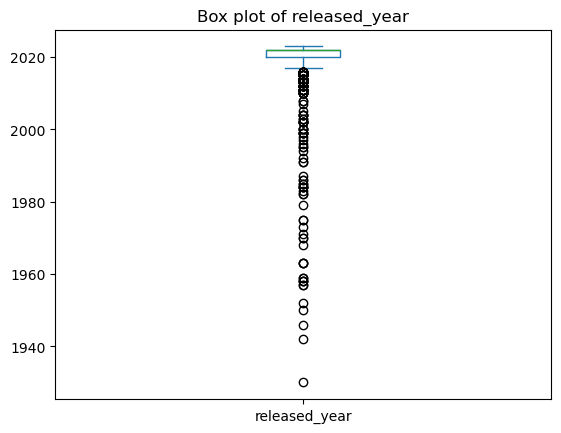

In [49]:
# Create a box plot to identify the outliers
df['released_year'].plot(kind='box')

# Add a title
plt.title('Box plot of released_year')

Text(0.5, 1.0, 'Box plot of artist_count')

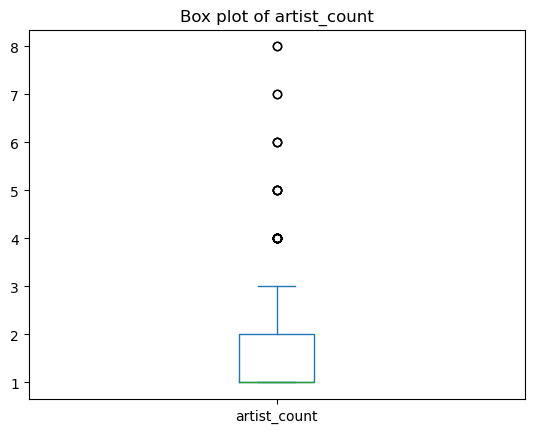

In [51]:
# Create a box plot to identify the outliers
df['artist_count'].plot(kind='box')

# Add a title
plt.title('Box plot of artist_count')

### **Top Performers**

#### Which track has the highest number of streams? Display the top 5 most streamed tracks.

In [54]:
# Create a variable for streams
streams = df['streams']

# Find the index of the row with the highest number of streams
max_streams = streams.idxmax()

# Identify the track name with the highest streams
highest_streams = df.loc[max_streams, 'track_name']

# Display the result
print("Track with highest number of streams: ", highest_streams)

Track with highest number of streams:  Blinding Lights


In [56]:
# Get the top 5 most streamed tracks
top_5_streams = streams.nlargest(5)

# Get the top 5 most streamed tracks
top5 = df.loc[top_5_streams.index, 'track_name'].reset_index(drop=True)

# Display the result
print("Top 5 streams:\n", top5)

Top 5 streams:
 0                                  Blinding Lights
1                                     Shape of You
2                                Someone You Loved
3                                     Dance Monkey
4    Sunflower - Spider-Man: Into the Spider-Verse
Name: track_name, dtype: object


#### Who are the top 5 most frequent artists based on the number of tracks in the dataset?

In [58]:
# Get the 5 most frequent names in the 'track_name' column
frequent_names = df['artist(s)_name'].value_counts().head(5)

# Display the result
print("Top 5 most frequent artists:\n", frequent_names)

Top 5 most frequent artists:
 artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64


‎ 

### **Temporal Trends**

#### Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.

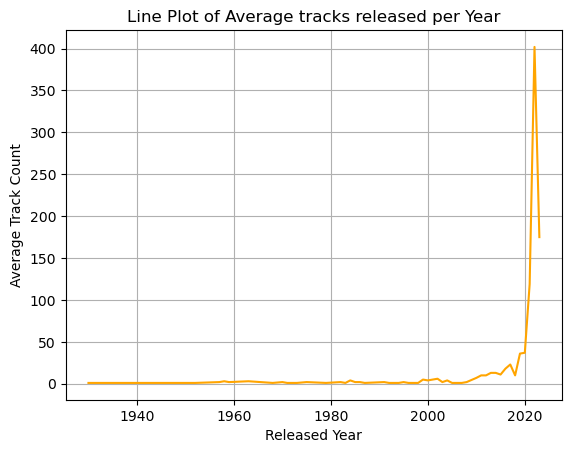

In [60]:
# Group data by 'released_year' and calculate mean of 'artist_count'
group = df.groupby('released_year')['track_name'].count()

# Create a line plot with the grouped data
plt.plot(group.index, group.values, color='orange', linestyle='-')
plt.title('Line Plot of Average tracks released per Year')

# Add label
plt.xlabel('Released Year')
plt.ylabel('Average Track Count')

# Add a grid
plt.grid(True)

# Display the result
plt.show()

#### Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

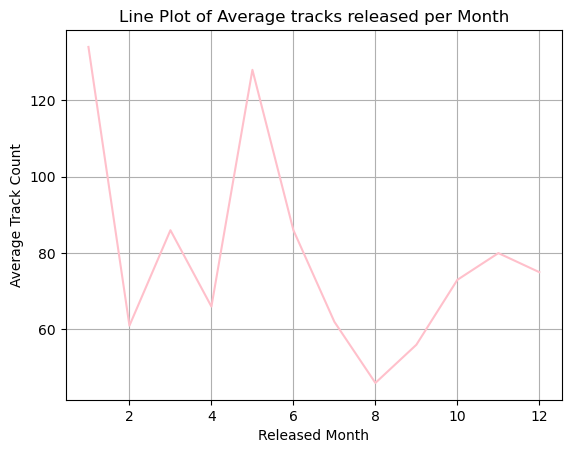

In [62]:
# Group data by 'released_month' and calculate mean of 'artist_count'
group = df.groupby('released_month')['track_name'].count()

# Create a line plot with the grouped data
plt.plot(group.index, group.values, color='pink', linestyle='-')
plt.title('Line Plot of Average tracks released per Month')

# Add label
plt.xlabel('Released Month')
plt.ylabel('Average Track Count')

# Add a grid
plt.grid(True)

# Display the result
plt.show()

‎ 

### **Genre and Music Characteristics**

#### Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?

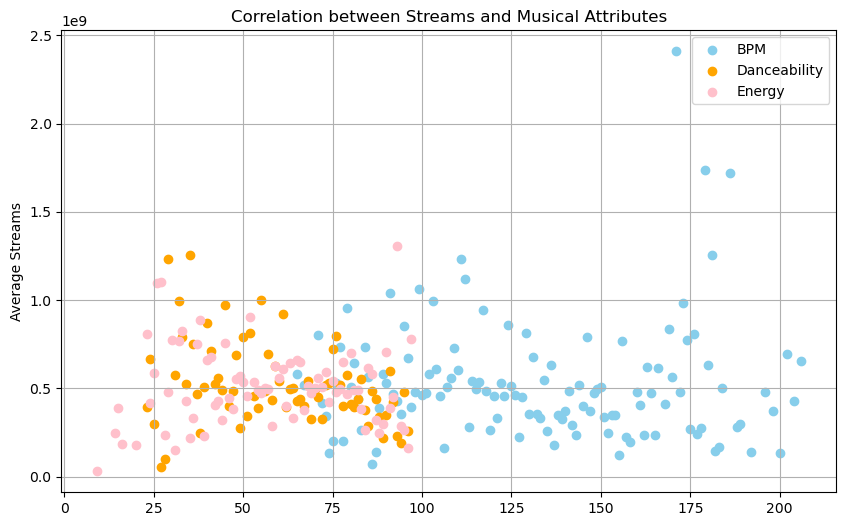

In [64]:
# Calculate mean streams for each musical attribute
mean_streams_bpm = df.groupby('bpm')['streams'].mean()
mean_streams_danceability = df.groupby('danceability_%')['streams'].mean()
mean_streams_energy = df.groupby('energy_%')['streams'].mean()

plt.style.use('default')
plt.figure(figsize=(10, 6))

# Create scatter plots for correlation
plt.scatter(mean_streams_bpm.index, mean_streams_bpm.values, color='skyblue', label='BPM')
plt.scatter(mean_streams_danceability.index, mean_streams_danceability.values, color='orange', label='Danceability')
plt.scatter(mean_streams_energy.index, mean_streams_energy.values, color='pink', label='Energy')

# Add a label
plt.ylabel('Average Streams')
plt.title('Correlation between Streams and Musical Attributes')

# Add a legend
plt.legend()

# Add a grid
plt.grid(True)

# Display the result
plt.show()

#### Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

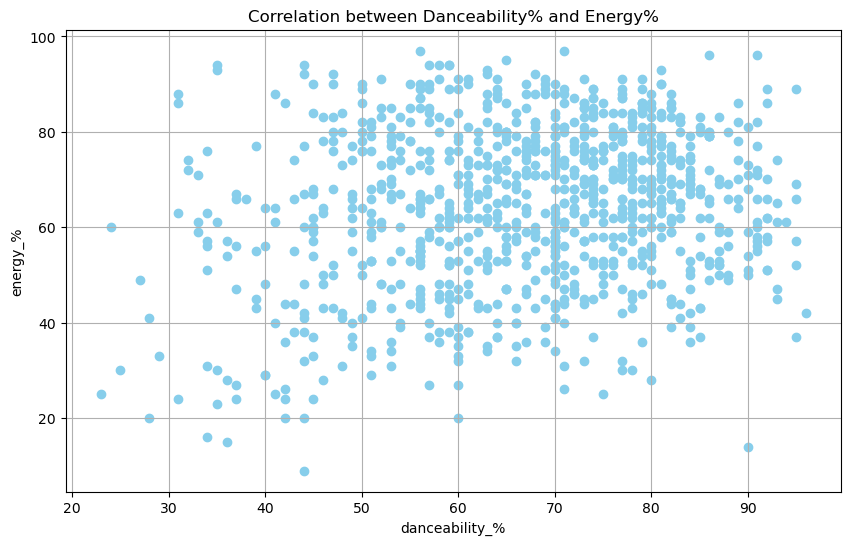

In [66]:
# Indicate the style to default and the figure size of the plot
plt.style.use('default')
plt.figure(figsize=(10, 6))

# Create scatter plots for correlation
plt.scatter(df['danceability_%'], df['energy_%'], color='skyblue')

# Add a label
plt.ylabel('energy_%')
plt.xlabel('danceability_%')
plt.title('Correlation between Danceability% and Energy%')

# Add a grid
plt.grid(True)

# Display the result
plt.show()

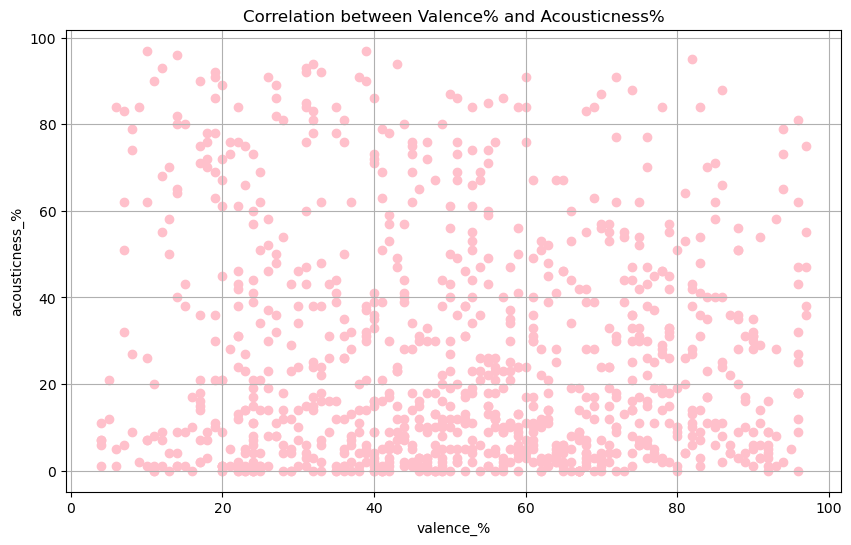

In [69]:
# Indicate the style to default and the figure size of the plot
plt.style.use('default')
plt.figure(figsize=(10, 6))

# Create scatter plots for correlation
plt.scatter(df['valence_%'], df['acousticness_%'], color='pink')

# Add a label
plt.ylabel('acousticness_%')
plt.xlabel('valence_%')
plt.title('Correlation between Valence% and Acousticness%')

# Add a grid
plt.grid(True)

# Display the result
plt.show()

### **Platform Popularity**

#### How do the numbers of tracks in spotify_playlists, deezer_playlist, and apple_playlists compare? Which platform seems to favor the most popular tracks?

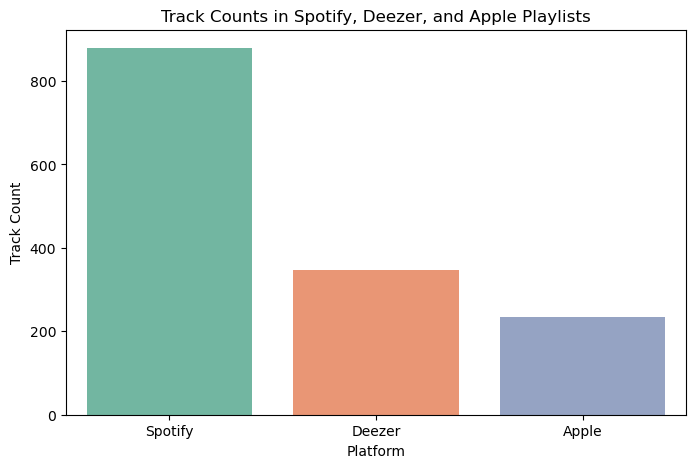

In [71]:
# Count the unique values in each playlist column
spotplay = df['in_spotify_playlists'].nunique()
deezplay = df['in_deezer_playlists'].nunique()
appleplay = df['in_apple_playlists'].nunique()

# Create a DataFrame for the counts
unique_counts = pd.DataFrame({
    'Platform': ['Spotify', 'Deezer', 'Apple'],
    'Unique Track Count': [spotplay, deezplay, appleplay]})

# Plot the unique counts as a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=unique_counts, x='Platform', y='Unique Track Count', palette='Set2')

# Add a label
plt.title('Track Counts in Spotify, Deezer, and Apple Playlists')
plt.ylabel('Track Count')

# Display the result
plt.show()

### **Advanced Analysis**

#### Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?

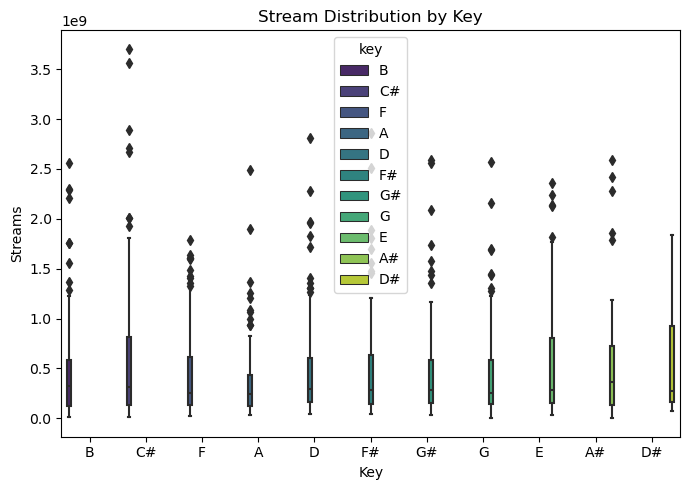

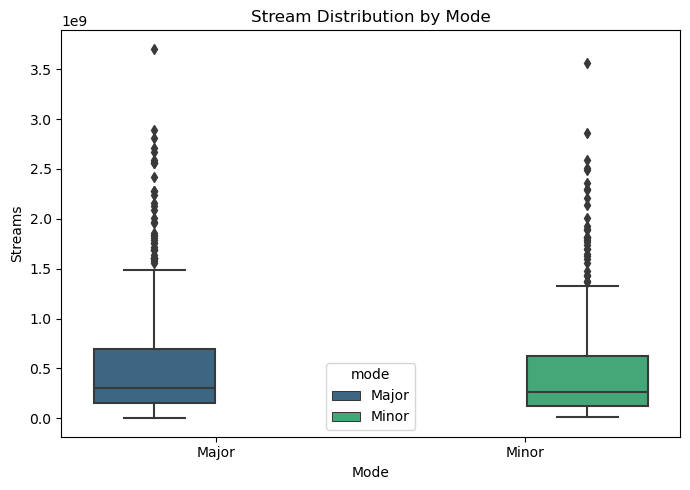

In [27]:
# Handle missing values 
df.dropna(subset=['streams', 'key', 'mode'], inplace=True)

# Create the first boxplot for the stream distribution by key
plt.figure(figsize=(7, 5))  # Set figure size
sns.boxplot(data=df, x='key', y='streams', hue='key', palette='viridis')
plt.title('Stream Distribution by Key')
plt.xlabel('Key')
plt.ylabel('Streams')
plt.tight_layout()
plt.show()

# Create the second boxplot for the stream distribution by mode
plt.figure(figsize=(7, 5))  # Set figure size
sns.boxplot(data=df, x='mode', y='streams', hue='mode', palette='viridis')
plt.title('Stream Distribution by Mode')
plt.xlabel('Mode')
plt.ylabel('Streams')
plt.tight_layout()
plt.show()

#### Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

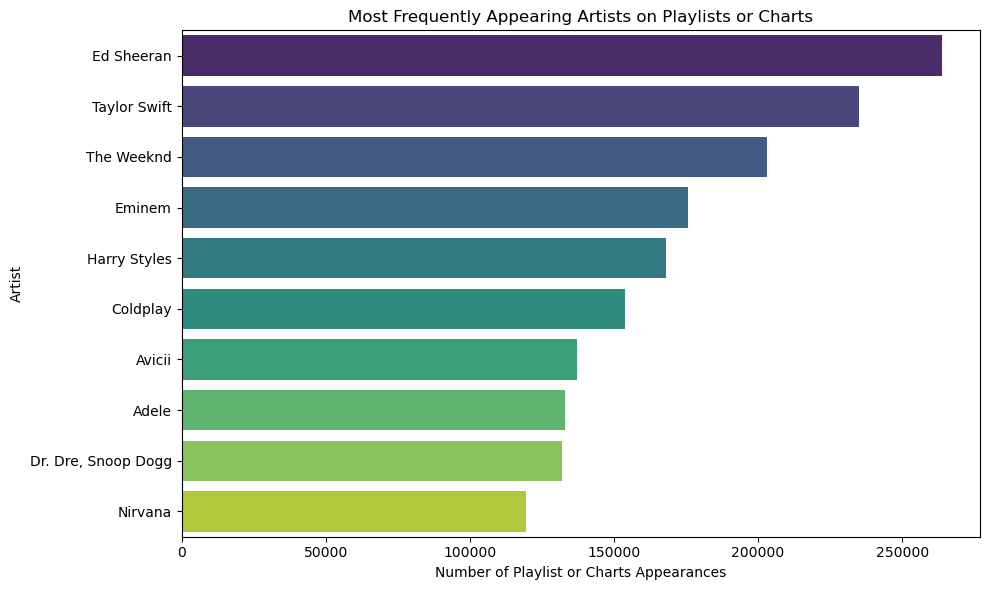

In [25]:
# Ensure the 'in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists' columns are numeric
df['in_spotify_playlists'] = pd.to_numeric(df['in_spotify_playlists'], errors='coerce').fillna(0)
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce').fillna(0)
df['in_apple_playlists'] = pd.to_numeric(df['in_apple_playlists'], errors='coerce').fillna(0)
df['in_spotify_charts'] = pd.to_numeric(df['in_spotify_playlists'], errors='coerce').fillna(0)
df['in_deezer_charts'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce').fillna(0)
df['in_apple_charts'] = pd.to_numeric(df['in_apple_playlists'], errors='coerce').fillna(0)

# Count how often each artist appears in any playlist (across Spotify, Deezer, Apple)
df['total_playcharts'] = df['in_spotify_playlists'] + df['in_deezer_playlists'] + df['in_apple_playlists'] + df['in_spotify_charts'] + df['in_deezer_charts'] + df['in_apple_charts']

# Group by artist and sum the total appearances across all platforms
artistplaychart = df.groupby('artist(s)_name')['total_playcharts'].sum().reset_index()

# Sort the artists by the number of playlist appearances (descending order)
artistplaychart = artistplaychart.sort_values(by='total_playcharts', ascending=False)

# Get the top N artists (for example, top 10)
toppy = artistplaychart.head(10)

# Plot the figure size
plt.figure(figsize=(10, 6))
sns.barplot(x='total_playcharts', y='artist(s)_name', data=toppy, palette='viridis')

# Add labels
plt.title('Most Frequently Appearing Artists on Playlists or Charts')
plt.xlabel('Number of Playlist or Charts Appearances')
plt.ylabel('Artist')
plt.tight_layout()

# Display the result
plt.show()